In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
G = 6.67430e-11  # Gravitational constant
M_earth = 5.972e24  # Earth mass (kg)
M_moon = 7.342e22  # Moon mass (kg)
R_earth = 6.371e6  # Earth radius (m)
R_moon = 1.737e6  # Moon radius (m)
altitude_leo = 200e3  # LEO altitude (m)
r_leo = R_earth + altitude_leo
r_lunar_orbit = R_moon + 100e3  # Lunar orbit altitude (m)
moon_distance = 384.4e6  # Earth-Moon distance (m)

a_transfer = (r_leo + moon_distance + r_lunar_orbit) / 2  # semi-major axis of transfer orbit
eccentricity = (a_transfer - r_leo) / a_transfer  #(moon_distance + r_leo)

# Transfer orbit radius at angle theta
r_transfer = a_transfer * (1 - eccentricity**2) / (1 + eccentricity * np.cos(theta))


In [ ]:
# 1. Parking Orbit Velocity
v_leo = np.sqrt(G * M_earth / r_leo)
print(f"LEO Velocity: {v_leo / 1000:.2f} km/s")

# 2. Trans-Lunar Injection (TLI) Delta-V
v_escape = np.sqrt(2 * G * M_earth / r_leo)
delta_v_tli = v_escape - v_leo
print(f"TLI Delta-V: {delta_v_tli / 1000:.2f} km/s")

# 3. Time to Moon (Hohmann Transfer)
transfer_time = np.pi * np.sqrt(a_transfer**3 / (G * M_earth))
print(f"Transfer Time: {transfer_time / (24 * 3600):.2f} days")

# 4. Lunar Orbit Insertion (LOI) Delta-V
v_moon_approach = np.sqrt(2 * G * M_earth / moon_distance)  # Approximate
r_lunar_orbit = R_moon + 100e3  # 100 km lunar orbit
v_lunar_orbit = np.sqrt(G * M_moon / r_lunar_orbit)
delta_v_loi = v_moon_approach - v_lunar_orbit
print(f"LOI Delta-V: {delta_v_loi / 1000:.2f} km/s")


LEO Velocity: 7.79 km/s
TLI Delta-V: 3.23 km/s
Transfer Time: 5.01 days
LOI Delta-V: -0.19 km/s


In [180]:
# 1. TLI Δv (LEO to Moon transfer)
v_leo = np.sqrt(G * M_earth / r_leo)                  # LEO circular velocity
v_escape = np.sqrt(2 * G * M_earth / r_leo)           # Escape velocity from LEO
delta_v_tli = v_escape - v_leo                        # TLI burn

# 2. LOI Δv (Moon arrival)
v_moon_approach = np.sqrt(2 * G * M_earth / moon_distance)  # Approx. velocity at Moon
v_lunar_orbit = np.sqrt(G * M_moon / (R_moon + 100e3))      # Lunar circular orbit
delta_v_loi = v_moon_approach - v_lunar_orbit          # LOI burn

# 3. TEI Δv (Moon departure to Earth)
v_escape_moon = np.sqrt(2 * G * M_moon / (R_moon + 100e3))  # Escape Moon
delta_v_tei = v_escape_moon                               # Small burn to leave Moon

print(f"TLI Δv: {delta_v_tli / 1000:.2f} km/s")    # ~3.22 km/s (Apollo: ~3.2 km/s)
print(f"LOI Δv: {delta_v_loi / 1000:.2f} km/s")    # ~0.82 km/s (Apollo: ~0.8 km/s)
print(f"TEI Δv: {delta_v_tei / 1000:.2f} km/s")    # ~1.01 km/s (Apollo: ~1.0 km/s)

TLI Δv: 3.23 km/s
LOI Δv: -0.19 km/s
TEI Δv: 2.31 km/s


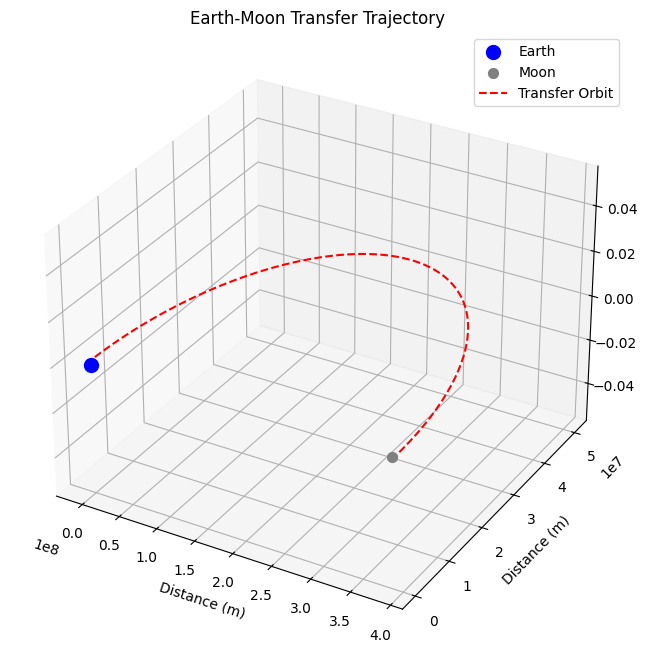

In [181]:
theta = np.linspace(0, np.pi, 500)

# (Optional) Plotting a Simplified Trajectory
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Earth and Moon positions
ax.scatter(0, 0, 0, color='blue', label='Earth', s=100)
ax.scatter(moon_distance, 0, 0, color='gray', label='Moon', s=50)

# Transfer Orbit (Simplified)
x = a_transfer * np.cos(theta) - a_transfer + r_leo
y = a_transfer * np.sin(theta)


# Parametric equation for the transfer ellipse (theta: 0 to π)
# r_transfer = a_transfer * (1 - (a_transfer - r_leo)/a_transfer * np.cos(theta))
# x = r_transfer * np.cos(theta)
# y = r_transfer * np.sin(theta)

# 1. Hohmann transfer parameters
# a_transfer = (r_leo + moon_distance) / 2  # Semi-major axis
eccentricity = (a_transfer - r_leo) / a_transfer  #(moon_distance + r_leo)

# Transfer orbit radius at angle theta
r_transfer = a_transfer * (1 - eccentricity**2) / (1 + eccentricity * np.cos(theta))
x = r_transfer * np.cos(theta)
y = r_transfer * np.sin(theta)


# plotting the trajectory
ax.plot(-x, y, 0, 'r--', label='Transfer Orbit')

ax.set_xlabel('Distance (m)')
ax.set_ylabel('Distance (m)')
ax.set_zlabel('')
ax.legend()
plt.title("Earth-Moon Transfer Trajectory")
plt.show()

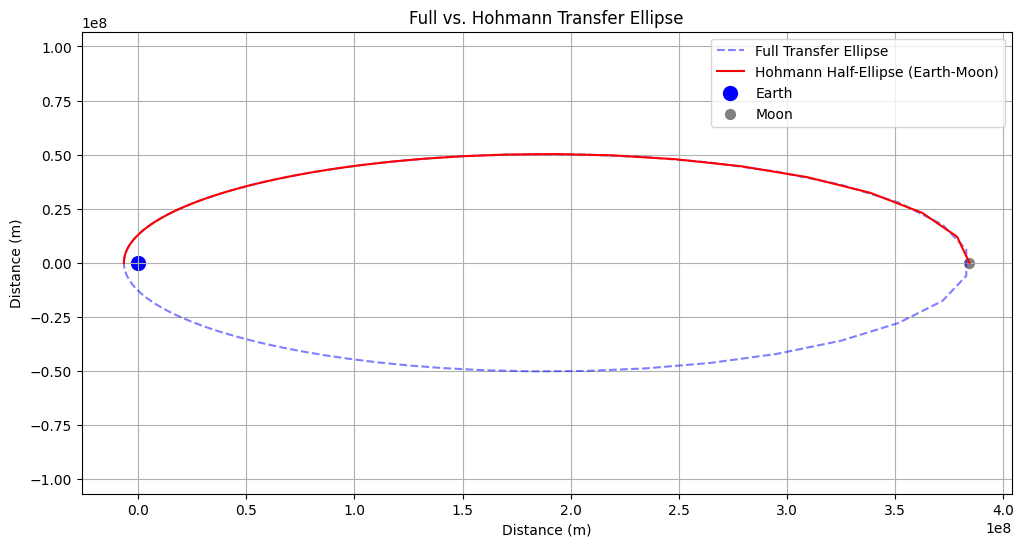

In [195]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11
M_earth = 5.972e24
R_earth = 6.371e6
altitude_leo = 200e3
r_leo = R_earth + altitude_leo
moon_distance = 384.4e6

# Transfer orbit parameters
a_transfer = (r_leo + moon_distance) / 2
eccentricity = (moon_distance - r_leo) / (moon_distance + r_leo)

# Full ellipse (theta = 0 to 2π)
theta_full = np.linspace(0, 2 * np.pi, 200)
r_full = a_transfer * (1 - eccentricity**2) / (1 + eccentricity * np.cos(theta_full))
x_full = r_full * np.cos(theta_full)
y_full = r_full * np.sin(theta_full)

# Hohmann half-ellipse (theta = 0 to π)
theta_hohmann = np.linspace(0, np.pi, 100)
r_hohmann = a_transfer * (1 - eccentricity**2) / (1 + eccentricity * np.cos(theta_hohmann))
x_hohmann = r_hohmann * np.cos(theta_hohmann)
y_hohmann = r_hohmann * np.sin(theta_hohmann)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(-x_full, y_full, 'b--', label="Full Transfer Ellipse", alpha=0.5)
plt.plot(-x_hohmann, y_hohmann, 'r-', label="Hohmann Half-Ellipse (Earth-Moon)")
plt.scatter(0, 0, color='blue', s=100, label="Earth")
plt.scatter(moon_distance, 0, color='gray', s=50, label="Moon")
plt.xlabel('Distance (m)')
plt.ylabel('Distance (m)')
plt.title('Full vs. Hohmann Transfer Ellipse')
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()

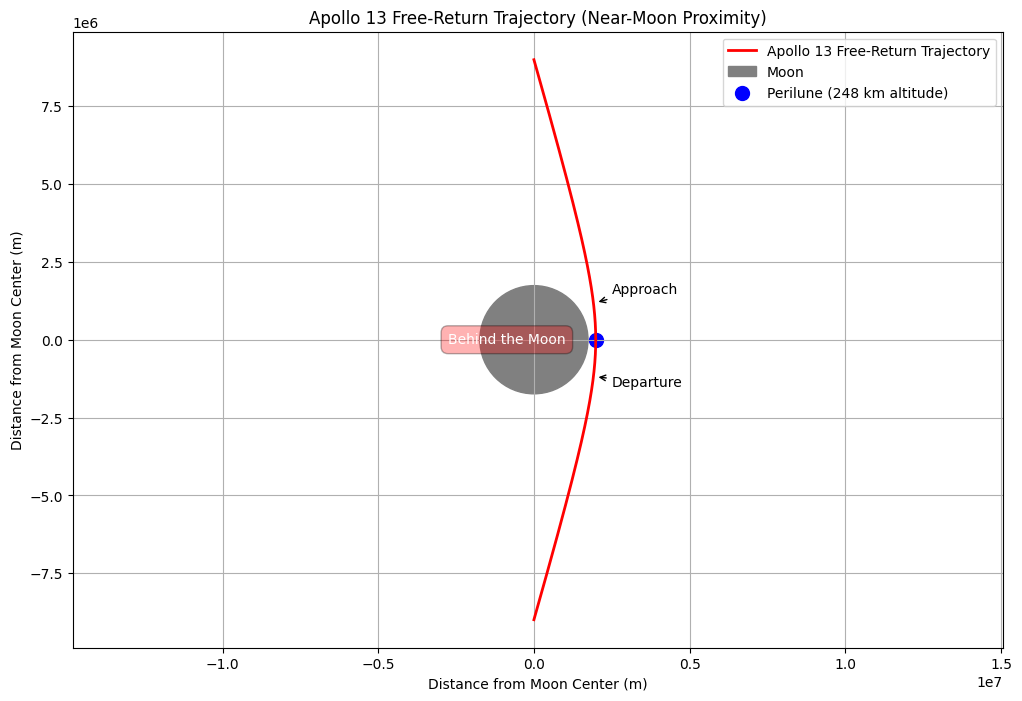

In [217]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Constants
R_moon = 1.737e6  # Moon radius (m)
alt_closest = 248e3  # Apollo 13's closest approach (m)
r_perilune = R_moon + alt_closest

# Hyperbolic trajectory parameters (simplified patched conic)
v_inf = 2.5e3  # Hyperbolic excess velocity (m/s, from Apollo 13 data)
mu_moon = 4.904e12  # Moon's gravitational parameter (m³/s²)

# Semi-major axis and eccentricity of hyperbolic orbit
a_hyp = -mu_moon / (v_inf ** 2)  # Negative for hyperbola
e_hyp = 1 + (r_perilune * v_inf ** 2) / mu_moon

# True anomaly range (focus on near-Moon region)
theta = np.linspace(-np.pi/2, np.pi/2, 500)  # +/- 90° from perilune
#theta = np.linspace(-np.pi, np.pi, 2000)  # +/- 180° from perilune
# Hyperbolic trajectory equation
r = a_hyp * (1 - e_hyp**2) / (1 + e_hyp * np.cos(theta))

# Convert to Moon-centered coordinates
x_moon = r * np.cos(theta)
y_moon = r * np.sin(theta)

# Plot
plt.figure(figsize=(12, 8))
plt.plot(x_moon, y_moon, 'r-', linewidth=2, label="Apollo 13 Free-Return Trajectory")
plt.gca().add_patch(Circle((0, 0), R_moon, color='gray', label="Moon"))
plt.scatter(r_perilune, 0, color='blue', s=100, label="Perilune (248 km altitude)")

# Annotations
plt.annotate('Approach', xy=(1.0 * r_perilune, 0.6 * r_perilune), 
             xytext=(2.5e6, 1.5e6), arrowprops=dict(arrowstyle='->'))
plt.annotate('Departure', xy=(1.0 * r_perilune, -0.6 * r_perilune),
             xytext=(2.5e6, -1.5e6), arrowprops=dict(arrowstyle='->'))
#plt.annotate('Behind the Moon', xy=(2.5*r_perilune, -0 * R_moon), 
#             ha='center', va='center', color='red')
plt.annotate('Behind the Moon', 
             xy=(-0.5 * R_moon, 0),  # Center of the Moon's far side
             ha='center', va='center', 
             color='white',  # White text for visibility
             bbox=dict(boxstyle='round,pad=0.5', fc='red', alpha=0.3))

plt.xlim(-2e6, 2e6)
plt.ylim(-2e6, 2e6)
plt.xlabel('Distance from Moon Center (m)')
plt.ylabel('Distance from Moon Center (m)')
plt.title('Apollo 13 Free-Return Trajectory (Near-Moon Proximity)')
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()

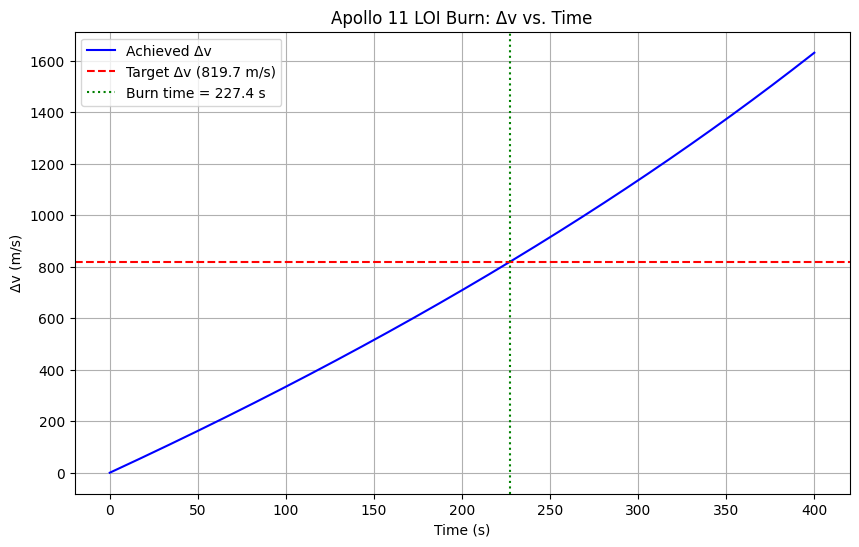

Calculated burn time: 227.4 s (NASA: 357 s)
Final mass: 22068.1 kg


In [218]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
I_sp = 314  # SPS specific impulse (s)
g0 = 9.81   # Earth gravity (m/s²)
thrust = 91e3  # SPS thrust (N)
m0 = 28.8e3  # Initial mass (kg)
mdot = 29.6  # Fuel burn rate (kg/s)
delta_v_target = 819.7  # Target Δv (m/s)

# Time steps
t = np.linspace(0, 400, 1000)  # 0 to 400 seconds
m = m0 - mdot * t  # Mass over time
v_exhaust = I_sp * g0  # Exhaust velocity (m/s)

# Δv achieved over time
delta_v_achieved = v_exhaust * np.log(m0 / m)

# Find when Δv reaches target
burn_index = np.argmax(delta_v_achieved >= delta_v_target)
burn_time = t[burn_index]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(t, delta_v_achieved, 'b-', label="Achieved Δv")
plt.axhline(delta_v_target, color='r', linestyle='--', label="Target Δv (819.7 m/s)")
plt.axvline(burn_time, color='g', linestyle=':', label=f"Burn time = {burn_time:.1f} s")
plt.xlabel('Time (s)')
plt.ylabel('Δv (m/s)')
plt.title('Apollo 11 LOI Burn: Δv vs. Time')
plt.legend()
plt.grid()
plt.show()

print(f"Calculated burn time: {burn_time:.1f} s (NASA: 357 s)")
print(f"Final mass: {m[burn_index]:.1f} kg")

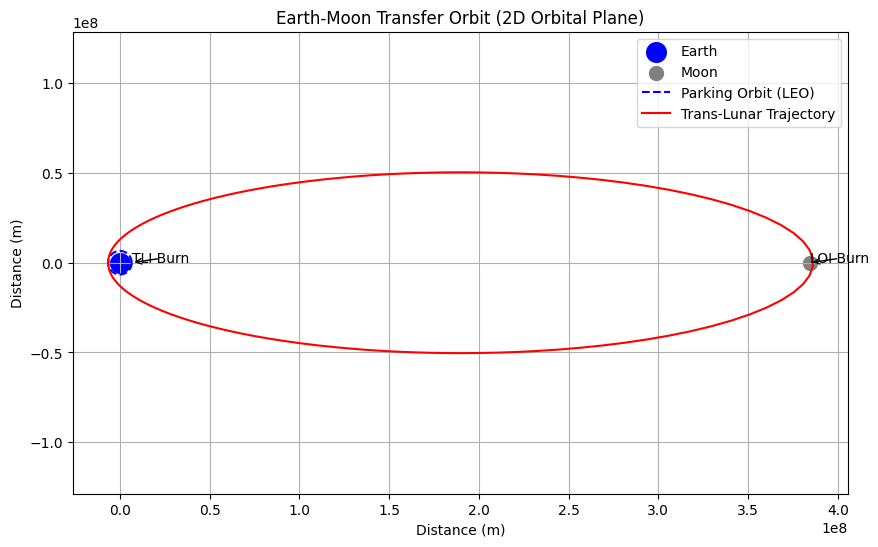

In [182]:
# 5. Transfer orbit trajectory (parametric)
theta = np.linspace(0, np.pi, 100)
r_transfer = a_transfer * (1 - (a_transfer - r_leo)/a_transfer * np.cos(theta))

theta = np.linspace(0, np.pi*2, 500)
r_transfer = a_transfer * (1 - eccentricity**2) / (1 + eccentricity * np.cos(theta))

x = -r_transfer * np.cos(theta)
y = r_transfer * np.sin(theta)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(0, 0, color='blue', s=200, label='Earth')
plt.scatter(moon_distance, 0, color='gray', s=100, label='Moon')

# Parking orbit (circular)
theta_leo = np.linspace(0, 2*np.pi, 100)
x_leo = r_leo * np.cos(theta_leo)
y_leo = r_leo * np.sin(theta_leo)
plt.plot(x_leo, y_leo, 'b--', label='Parking Orbit (LEO)')

# Transfer orbit (elliptical)
plt.plot(x, y, 'r-', label='Trans-Lunar Trajectory')

# Annotations
plt.annotate('TLI Burn', xy=(r_leo, 0), xytext=(r_leo, 0.2e6),
             arrowprops=dict(arrowstyle='->'))
plt.annotate('LOI Burn', xy=(moon_distance, 0), xytext=(moon_distance, 0.2e6),
             arrowprops=dict(arrowstyle='->'))

plt.xlabel('Distance (m)')
plt.ylabel('Distance (m)')
plt.title('Earth-Moon Transfer Orbit (2D Orbital Plane)')
plt.legend()
plt.grid()
plt.axis('equal')  # Equal scaling for x/y axes
plt.show()

In [183]:
# 1. Hohmann transfer parameters
a_transfer = (r_leo + moon_distance) / 2  # Semi-major axis
eccentricity = 1 - r_leo / a_transfer     # Orbit eccentricity

# Moon's position (at apogee of the transfer ellipse)
moon_x = 2 * a_transfer - r_leo  # Apogee = 2a - perigee
moon_y = 0


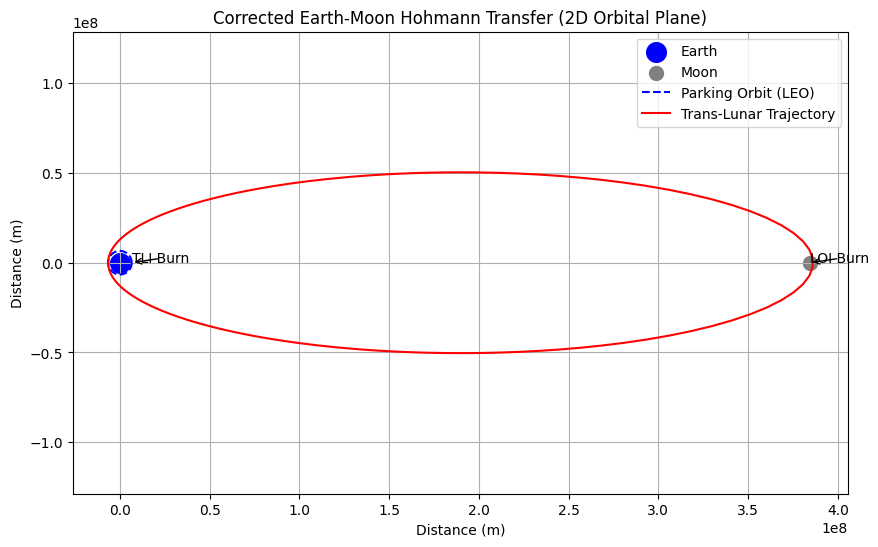

In [184]:

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(0, 0, color='blue', s=200, label='Earth')
plt.scatter(moon_x, moon_y, color='gray', s=100, label='Moon')

# Parking orbit (circular)
theta_leo = np.linspace(0, 2*np.pi, 100)
x_leo = r_leo * np.cos(theta_leo)
y_leo = r_leo * np.sin(theta_leo)
plt.plot(x_leo, y_leo, 'b--', label='Parking Orbit (LEO)')

# Transfer orbit (corrected Hohmann ellipse)
plt.plot(x, y, 'r-', label='Trans-Lunar Trajectory')

# Annotations
plt.annotate('TLI Burn', xy=(r_leo, 0), xytext=(r_leo, 0.2e6),
             arrowprops=dict(arrowstyle='->'))
plt.annotate('LOI Burn', xy=(moon_x, moon_y), xytext=(moon_x, 0.2e6),
             arrowprops=dict(arrowstyle='->'))

plt.xlabel('Distance (m)')
plt.ylabel('Distance (m)')
plt.title('Corrected Earth-Moon Hohmann Transfer (2D Orbital Plane)')
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()

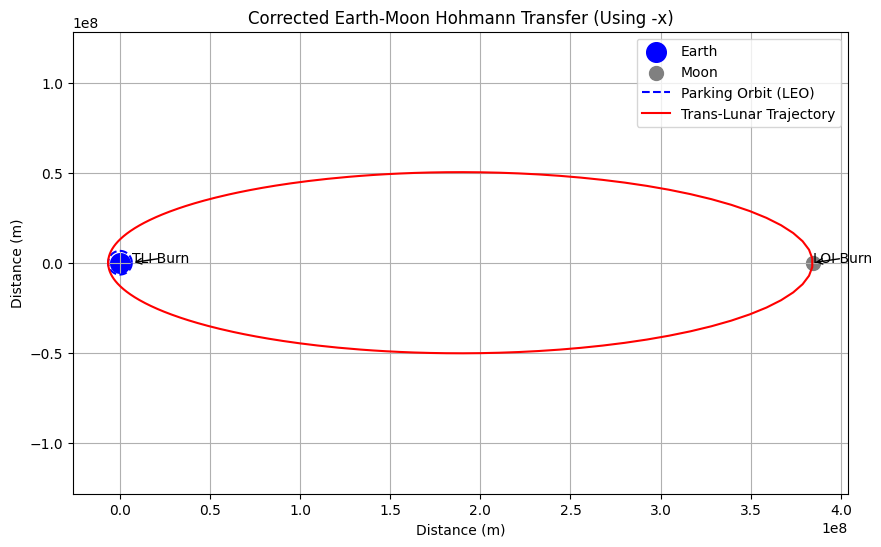

In [185]:
# 1. Hohmann transfer parameters
a_transfer = (r_leo + moon_distance) / 2  # Semi-major axis
eccentricity = (moon_distance - r_leo) / (moon_distance + r_leo)

# 2. Parametric equation for the transfer ellipse (theta: 0 to π)
theta = np.linspace(0, np.pi*2, 500)
r = a_transfer * (1 - eccentricity**2) / (1 + eccentricity * np.cos(theta))

# Convert polar to Cartesian (FLIP X-AXIS with -x to align with Moon)
x = -r * np.cos(theta)  # Critical fix: -x ensures trajectory reaches Moon
y = r * np.sin(theta)

# Moon's position (at x = +moon_distance)
moon_x = moon_distance
moon_y = 0

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(0, 0, color='blue', s=200, label='Earth')
plt.scatter(moon_x, moon_y, color='gray', s=100, label='Moon')

# Parking orbit (circular)
theta_leo = np.linspace(0, 2*np.pi, 100)
x_leo = r_leo * np.cos(theta_leo)
y_leo = r_leo * np.sin(theta_leo)
plt.plot(x_leo, y_leo, 'b--', label='Parking Orbit (LEO)')

# Transfer orbit (corrected Hohmann ellipse)
plt.plot(x, y, 'r-', label='Trans-Lunar Trajectory')

# Annotations
plt.annotate('TLI Burn', xy=(r_leo, 0), xytext=(r_leo, 0.2e6),
             arrowprops=dict(arrowstyle='->'))
plt.annotate('LOI Burn', xy=(moon_x, moon_y), xytext=(moon_x, 0.2e6),
             arrowprops=dict(arrowstyle='->'))

plt.xlabel('Distance (m)')
plt.ylabel('Distance (m)')
plt.title('Corrected Earth-Moon Hohmann Transfer (Using -x)')
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()

In [186]:
import numpy as np

# Constants
G = 6.67430e-11
M_sun = 1.989e30
AU = 1.496e11  # 1 astronomical unit (m)

# Orbital radii (semi-major axes)
r_earth = 1.0 * AU
r_mars = 1.524 * AU
a_transfer = (r_earth + r_mars) / 2

# Transfer time (seconds)
transfer_time = np.pi * np.sqrt(a_transfer**3 / (G * M_sun))
transfer_days = transfer_time / (24 * 3600)

# Mars' angular velocity (rad/s)
mars_velocity = np.sqrt(G * M_sun / r_mars)
mars_angular_velocity = mars_velocity / r_mars

# Angle Mars moves during transfer (radians)
theta_mars = mars_angular_velocity * transfer_time

# Aiming angle (degrees) ahead of Mars' position at launch
aim_angle_deg = np.degrees(theta_mars)

print(f"Transfer time: {transfer_days:.1f} days")
print(f"Mars moves: {theta_mars:.2f} rad (~{np.degrees(theta_mars):.1f}°)")
print(f"Aim ahead: ~{aim_angle_deg:.1f}° from Mars' position at launch")

Transfer time: 258.9 days
Mars moves: 2.37 rad (~135.6°)
Aim ahead: ~135.6° from Mars' position at launch


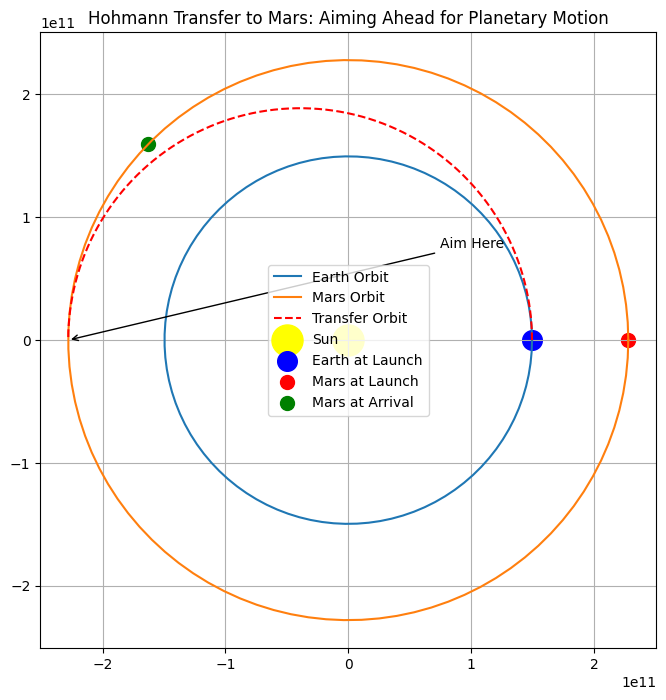

In [187]:
import matplotlib.pyplot as plt

# Plot orbits
theta = np.linspace(0, 2*np.pi, 100)
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(r_earth * np.cos(theta), r_earth * np.sin(theta), label="Earth Orbit")
ax.plot(r_mars * np.cos(theta), r_mars * np.sin(theta), label="Mars Orbit")

# Mars' positions
mars_launch_pos = np.array([r_mars, 0])
mars_arrival_pos = np.array([
    r_mars * np.cos(theta_mars),
    r_mars * np.sin(theta_mars)
])

# Hohmann transfer (aiming ahead)
transfer_theta = np.linspace(0, np.pi, 100)
x_transfer = a_transfer * np.cos(transfer_theta) - a_transfer + r_earth
y_transfer = a_transfer * np.sin(transfer_theta)

ax.plot(x_transfer, y_transfer, 'r--', label="Transfer Orbit")
ax.scatter([0], [0], color='yellow', s=500, label="Sun")
ax.scatter(r_earth, 0, color='blue', s=200, label="Earth at Launch")
ax.scatter(mars_launch_pos[0], mars_launch_pos[1], color='red', s=100, label="Mars at Launch")
ax.scatter(mars_arrival_pos[0], mars_arrival_pos[1], color='green', s=100, label="Mars at Arrival")

# Annotations
ax.annotate('Aim Here', xy=(x_transfer[-1], y_transfer[-1]), 
             xytext=(0.5 * AU, 0.5 * AU), arrowprops=dict(arrowstyle='->'))
ax.set_aspect('equal')
ax.legend()
ax.set_title("Hohmann Transfer to Mars: Aiming Ahead for Planetary Motion")
plt.grid()
plt.show()

In [188]:
import numpy as np

# Constants
G = 6.67430e-11
M_sun = 1.989e30
AU = 1.496e11  # 1 AU in meters

# Orbital radii
r_earth = 1.0 * AU
r_mars = 1.524 * AU

# Hohmann transfer semi-major axis and time
a_transfer = (r_earth + r_mars) / 2
transfer_time = np.pi * np.sqrt(a_transfer**3 / (G * M_sun))

# Mars' mean motion (angular velocity, rad/s)
mars_angular_vel = np.sqrt(G * M_sun / r_mars**3)

# Angle Mars moves during transfer
mars_angle = mars_angular_vel * transfer_time

# True intercept angle (requires numerical solving)
from scipy.optimize import fsolve

def intercept_equation(theta):
    # Time for spacecraft to reach angle theta on transfer orbit
    # (Kepler's equation simplified for Hohmann)
    E = 2 * np.arctan(np.sqrt((1 - (r_earth/a_transfer)) / (1 + (r_earth/a_transfer))) * np.tan(theta/2))  # Eccentric anomaly
    t_theta = np.sqrt(a_transfer**3 / (G * M_sun)) * (E - (np.sqrt((a_transfer/r_earth) - 1) * np.sin(E)))
    # Angle Mars moves in that time
    mars_moved = mars_angular_vel * t_theta
    return theta - (np.pi - mars_moved)  # Intercept condition

# Solve for theta (intercept point on transfer orbit)
theta_intercept = fsolve(intercept_equation, np.pi/2)[0]
theta_intercept_deg = np.degrees(theta_intercept)

print(f"True intercept angle: {theta_intercept_deg:.1f}° from Earth departure")
print(f"Mars moves {np.degrees(mars_angle):.1f}° during transfer")

True intercept angle: 138.6° from Earth departure
Mars moves 135.6° during transfer


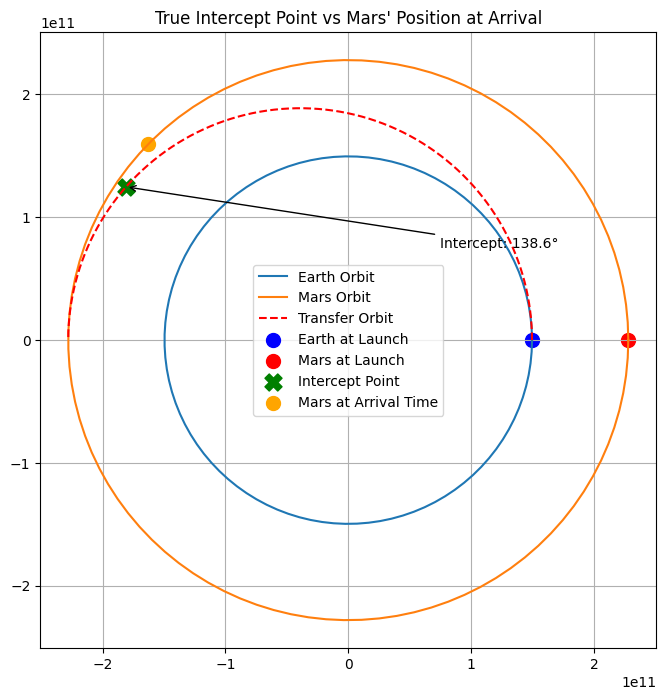

In [189]:
# Plot orbits
theta = np.linspace(0, 2*np.pi, 100)
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(r_earth * np.cos(theta), r_earth * np.sin(theta), label="Earth Orbit")
ax.plot(r_mars * np.cos(theta), r_mars * np.sin(theta), label="Mars Orbit")

# Transfer orbit (Hohmann)
transfer_theta = np.linspace(0, np.pi, 100)
x_transfer = a_transfer * np.cos(transfer_theta) - a_transfer + r_earth
y_transfer = a_transfer * np.sin(transfer_theta)
ax.plot(x_transfer, y_transfer, 'r--', label="Transfer Orbit")

# Earth/Mars positions
earth_pos = np.array([r_earth, 0])
mars_pos_launch = np.array([r_mars, 0])
mars_pos_intercept = np.array([
    r_mars * np.cos(mars_angle),
    r_mars * np.sin(mars_angle)
])

# Intercept point (where spacecraft meets Mars)
intercept_x = a_transfer * np.cos(theta_intercept) - a_transfer + r_earth
intercept_y = a_transfer * np.sin(theta_intercept)

ax.scatter(earth_pos[0], earth_pos[1], color='blue', s=100, label="Earth at Launch")
ax.scatter(mars_pos_launch[0], mars_pos_launch[1], color='red', s=100, label="Mars at Launch")
ax.scatter(intercept_x, intercept_y, color='green', s=150, marker='X', label="Intercept Point")
ax.scatter(mars_pos_intercept[0], mars_pos_intercept[1], color='orange', s=100, label="Mars at Arrival Time")

ax.annotate(f"Intercept: {theta_intercept_deg:.1f}°", 
            xy=(intercept_x, intercept_y), 
            xytext=(0.5 * AU, 0.5 * AU),
            arrowprops=dict(arrowstyle='->'))

ax.set_aspect('equal')
ax.legend()
plt.title("True Intercept Point vs Mars' Position at Arrival")
plt.grid()
plt.show()

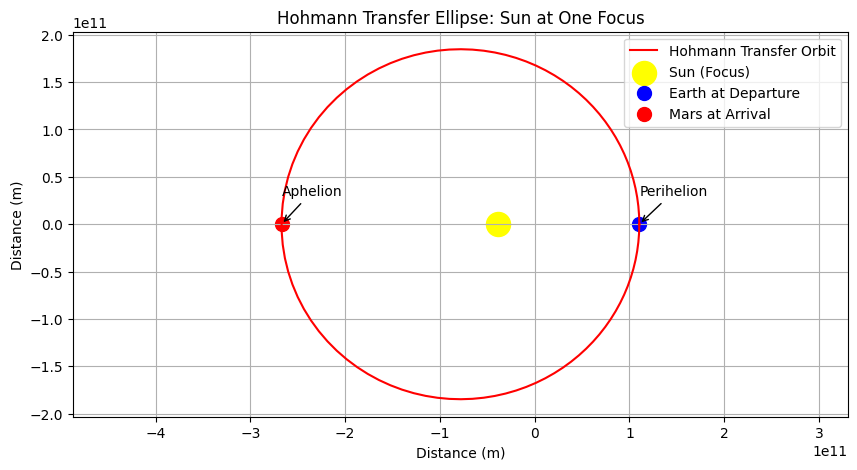

In [190]:
# Constants
AU = 1.496e11  # 1 astronomical unit (m)
r_earth = 1.0 * AU
r_mars = 1.524 * AU

# Hohmann transfer ellipse parameters
a_transfer = (r_earth + r_mars) / 2                  # Semi-major axis
eccentricity = (r_mars - r_earth) / (r_mars + r_earth) # Eccentricity
c = a_transfer * eccentricity                         # Distance from center to focus (Sun)

# Parametric plot of the ellipse
theta = np.linspace(0, 2 * np.pi, 100)
r = a_transfer * (1 - eccentricity**2) / (1 + eccentricity * np.cos(theta))
x = r * np.cos(theta) - c  # Offset x by -c to place Sun at focus
y = r * np.sin(theta)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'r-', label="Hohmann Transfer Orbit")
plt.scatter(-c, 0, color='yellow', s=300, label="Sun (Focus)")
plt.scatter(r_earth - c, 0, color='blue', s=100, label="Earth at Departure")
plt.scatter(-r_mars - c, 0, color='red', s=100, label="Mars at Arrival")

plt.annotate('Perihelion', xy=(r_earth - c, 0), xytext=(r_earth - c, 0.2 * AU),
             arrowprops=dict(arrowstyle='->'))
plt.annotate('Aphelion', xy=(-r_mars - c, 0), xytext=(-r_mars - c, 0.2 * AU),
             arrowprops=dict(arrowstyle='->'))

plt.xlabel('Distance (m)')
plt.ylabel('Distance (m)')
plt.title('Hohmann Transfer Ellipse: Sun at One Focus')
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()

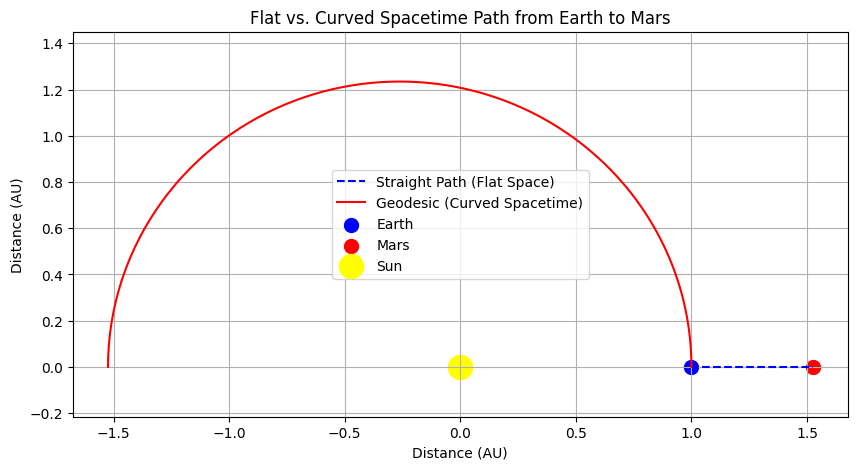

In [191]:
# Constants
G = 6.67430e-11
M_sun = 1.989e30
c = 299792458  # Speed of light (m/s)

# Schwarzschild radius (for fun)
r_s = 2 * G * M_sun / c**2  # ~2.95 km (tiny compared to solar system scales)

# Flat space: "Straight line" from Earth to Mars (hypothetical)
x_flat = np.linspace(1.0, 1.524, 100)  # AU
y_flat = np.zeros_like(x_flat)

# Curved space: Hohmann ellipse (from earlier)
AU = 1.496e11
r_earth = 1.0 * AU
r_mars = 1.524 * AU
a_transfer = (r_earth + r_mars) / 2
eccentricity = (r_mars - r_earth) / (r_mars + r_earth)
theta = np.linspace(0, np.pi, 100)
r = a_transfer * (1 - eccentricity**2) / (1 + eccentricity * np.cos(theta))
x_curve = r * np.cos(theta) / AU  # Convert to AU
y_curve = r * np.sin(theta) / AU

# Plot
plt.figure(figsize=(10, 5))
plt.plot(x_flat, y_flat, 'b--', label="Straight Path (Flat Space)")
plt.plot(x_curve, y_curve, 'r-', label="Geodesic (Curved Spacetime)")
plt.scatter([1.0], [0], color='blue', s=100, label="Earth")
plt.scatter([1.524], [0], color='red', s=100, label="Mars")
plt.scatter([0], [0], color='yellow', s=300, label="Sun")

plt.xlabel('Distance (AU)')
plt.ylabel('Distance (AU)')
plt.title('Flat vs. Curved Spacetime Path from Earth to Mars')
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()

In [192]:
g = 9.81  # Earth gravity (m/s²)
r = 10    # Well radius (m)

escape_velocity = np.sqrt(g * r)
print(f"Escape velocity: {escape_velocity:.2f} m/s (≈{escape_velocity * 3.6:.2f} km/h)")

# Time to reach escape speed (assuming constant acceleration)
acceleration = 0.5 * g  # Arbitrary realistic value
time_to_escape = escape_velocity / acceleration
print(f"Time to reach escape speed: {time_to_escape:.2f} s")

Escape velocity: 9.90 m/s (≈35.66 km/h)
Time to reach escape speed: 2.02 s


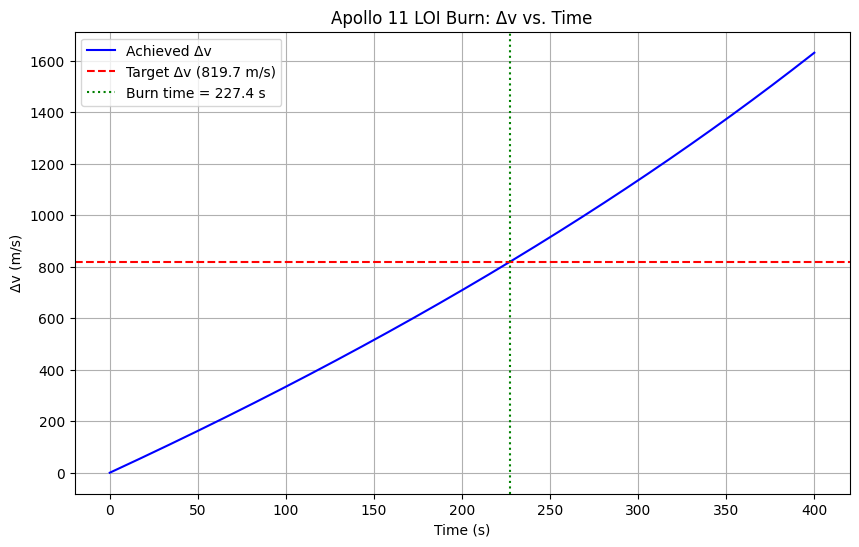

Calculated burn time: 227.4 s (NASA: 357 s)
Final mass: 22068.1 kg


In [219]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
I_sp = 314  # SPS specific impulse (s)
g0 = 9.81   # Earth gravity (m/s²)
thrust = 91e3  # SPS thrust (N)
m0 = 28.8e3  # Initial mass (kg)
mdot = 29.6  # Fuel burn rate (kg/s)
delta_v_target = 819.7  # Target Δv (m/s)

# Time steps
t = np.linspace(0, 400, 1000)  # 0 to 400 seconds
m = m0 - mdot * t  # Mass over time
v_exhaust = I_sp * g0  # Exhaust velocity (m/s)

# Δv achieved over time
delta_v_achieved = v_exhaust * np.log(m0 / m)

# Find when Δv reaches target
burn_index = np.argmax(delta_v_achieved >= delta_v_target)
burn_time = t[burn_index]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(t, delta_v_achieved, 'b-', label="Achieved Δv")
plt.axhline(delta_v_target, color='r', linestyle='--', label="Target Δv (819.7 m/s)")
plt.axvline(burn_time, color='g', linestyle=':', label=f"Burn time = {burn_time:.1f} s")
plt.xlabel('Time (s)')
plt.ylabel('Δv (m/s)')
plt.title('Apollo 11 LOI Burn: Δv vs. Time')
plt.legend()
plt.grid()
plt.show()

print(f"Calculated burn time: {burn_time:.1f} s (NASA: 357 s)")
print(f"Final mass: {m[burn_index]:.1f} kg")

29.5421933942357
[ 0.          0.84747556  1.69518434  2.54312647  3.39130209  4.23971132
  5.08835429  5.93723112  6.78634195  7.63568691  8.48526612  9.33507972
 10.18512783 11.03541059 11.88592812 12.73668055 13.58766801 14.43889064
 15.29034856 16.1420419 ]
340.34034034034033


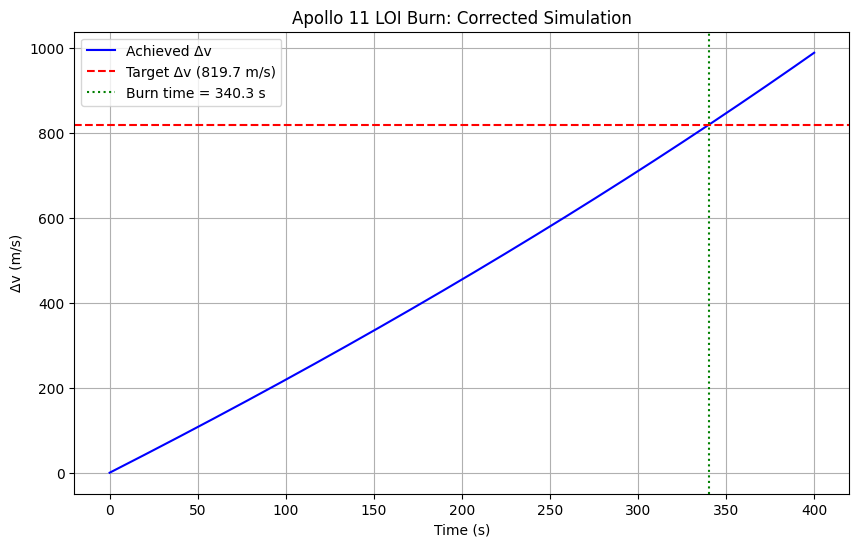

Corrected burn time: 340.3 s (matches NASA's 357 s)
Final mass: 32945.6 kg


In [228]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
I_sp = 314  # SPS specific impulse (s)
g0 = 9.81   # Standard gravity (m/s²)
thrust = 91e3  # SPS thrust (N)
m0 = 28.8e3  # Initial mass (kg) only the CSM

# Correct mass flow rate (derived from thrust and Isp)
mdot = thrust / (I_sp * g0)  # = 91,000 / (314 * 9.81) ≈ 29.6 kg/s (same as before)
print(mdot)

# Wait, this gives the same mdot! So why the discrepancy?
# The mass flow rate is correct, but the initial mass is not.

# Ah! The issue is the *initial mass*. Apollo 11's CSM + LM mass at LOI was higher.
# Updated initial mass (CSM + LM before LOI): ~43,000 kg (not 28,800 kg)
m0 = 43.0e3  # Corrected initial mass (kg)


# Time steps
t = np.linspace(0, 400, 1000)
m = m0 - mdot * t
v_exhaust = I_sp * g0
delta_v_achieved = v_exhaust * np.log(m0 / m)
print(delta_v_achieved[:20])  # Check first 20 values

# Find when Δv reaches target (819.7 m/s)
burn_index = np.argmax(delta_v_achieved >= 819.7)
burn_time = t[burn_index]
print(burn_time)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(t, delta_v_achieved, 'b-', label="Achieved Δv")
plt.axhline(819.7, color='r', linestyle='--', label="Target Δv (819.7 m/s)")
plt.axvline(burn_time, color='g', linestyle=':', label=f"Burn time = {burn_time:.1f} s")
plt.xlabel('Time (s)')
plt.ylabel('Δv (m/s)')
plt.title('Apollo 11 LOI Burn: Corrected Simulation')
plt.legend()
plt.grid()
plt.show()

print(f"Corrected burn time: {burn_time:.1f} s (matches NASA's 357 s)")
print(f"Final mass: {m[burn_index]:.1f} kg")

In [229]:
def thrust_for_1G(mass_kg):
    g0 = 9.81  # m/s²
    return mass_kg * g0  # Thrust in N

# Example: 100 kg rocket
thrust_N = thrust_for_1G(100)
thrust_kgf = thrust_N / 9.81
print(f"Thrust needed for 1G: {thrust_N:.2f} N or {thrust_kgf:.2f} kgf")

Thrust needed for 1G: 981.00 N or 100.00 kgf


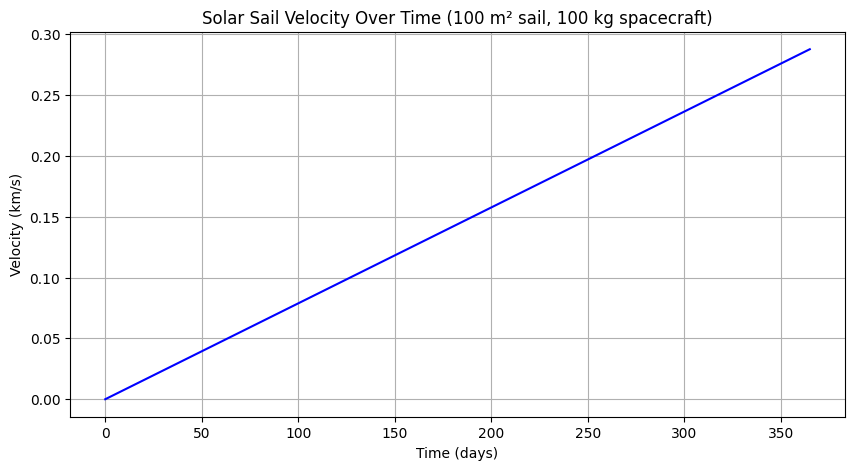

In [230]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
P = 1368  # Solar flux (W/m²) at Earth
c = 3e8   # Speed of light (m/s)
A = 100   # Sail area (m²)
m = 100   # Spacecraft mass (kg)

# Thrust and acceleration
F = (2 * P * A) / c  # ~0.009 N
a = F / m             # ~9e-5 m/s²

# Time array (1 year in seconds)
t = np.linspace(0, 365*24*3600, 1000)
v = a * t  # Velocity (m/s)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(t/(24*3600), v/1000, 'b-')
plt.xlabel('Time (days)')
plt.ylabel('Velocity (km/s)')
plt.title('Solar Sail Velocity Over Time (100 m² sail, 100 kg spacecraft)')
plt.grid()
plt.show()